In [16]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
data=pd.read_csv("train.csv")
train_df = pd.read_csv("train.csv", index_col='PassengerId') 

In [10]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


**Заполним пропуски медианными значениями.**

In [11]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna('S', inplace=True)

In [12]:
train_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

**Постройте попарные зависимости признаков `Age`, `Fare`, `Pclass`, `SibSp` и `Parch` (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

In [13]:
sns.pairplot?

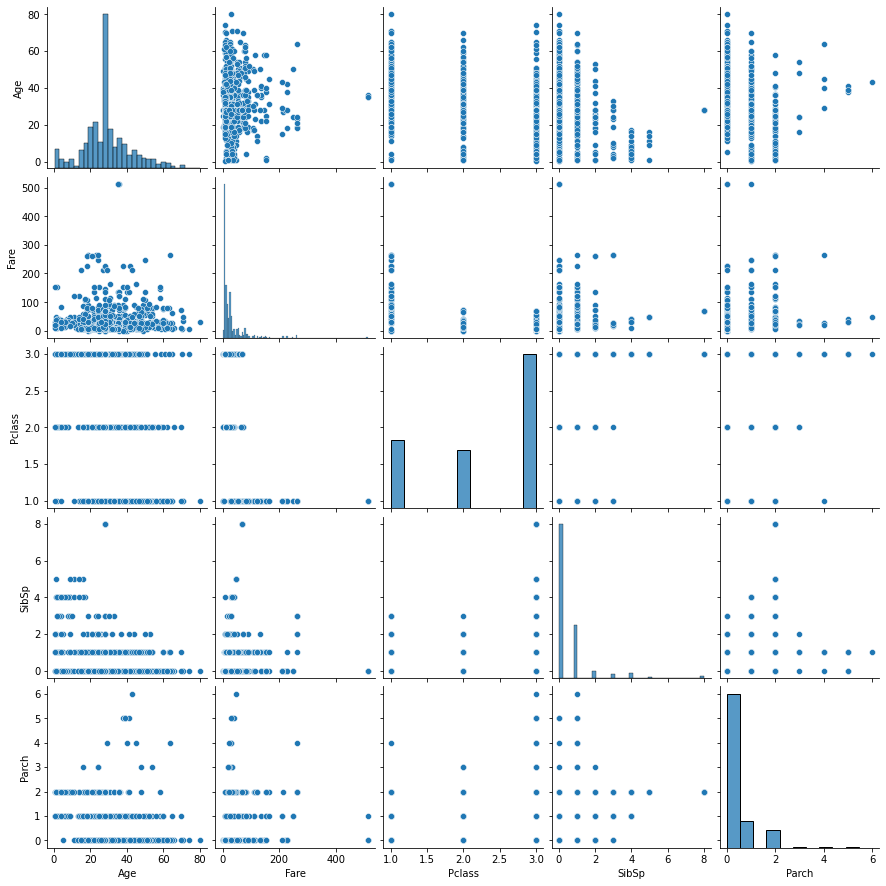

In [14]:
sns.pairplot(train_df,vars=['Age','Fare','Pclass','SibSp','Parch'])

**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

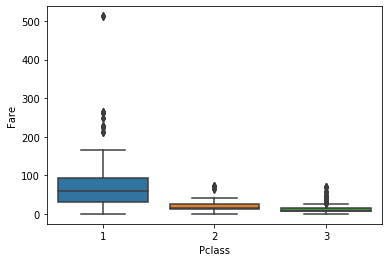

In [8]:
sns.boxplot(x='Pclass',y='Fare',data=train_df)

**Такой boxplot получается не очень красивым из-за выбросов.** 

**Опционально: создайте признак `Fare_no_out` - стоимости без выбросов, в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: Надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости.**

<AxesSubplot:xlabel='Pclass', ylabel='Fare_no_out'>

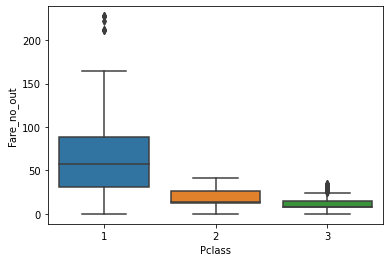

In [15]:
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']
fare_pclass1_no_out = fare_pclass1[(fare_pclass1<= fare_pclass1.mean()+ fare_pclass1.std()*2) & (fare_pclass1>= fare_pclass1.mean()- fare_pclass1.std()*2)]
fare_pclass2_no_out = fare_pclass2[(fare_pclass2<= fare_pclass2.mean()+ fare_pclass2.std()*2) & (fare_pclass2>= fare_pclass2.mean()- fare_pclass2.std()*2)]
fare_pclass3_no_out = fare_pclass3[(fare_pclass3<= fare_pclass3.mean()+ fare_pclass3.std()*2) & (fare_pclass3>= fare_pclass3.mean()- fare_pclass3.std()*2)]
train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out).append(fare_pclass3_no_out)
sns.boxplot(x='Pclass',y='Fare_no_out',data=train_df)  
# Ваш код здесь

In [16]:
fare_pclass1

PassengerId
2      71.2833
4      53.1000
7      51.8625
12     26.5500
24     35.5000
        ...   
872    52.5542
873     5.0000
880    83.1583
888    30.0000
890    30.0000
Name: Fare, Length: 216, dtype: float64

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.**

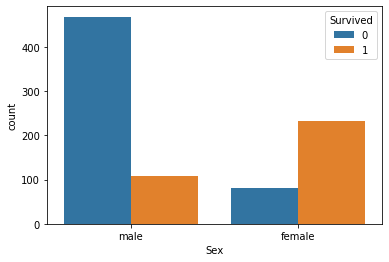

In [11]:
sns.countplot(x='Sex', hue='Survived', data=train_df)

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.**

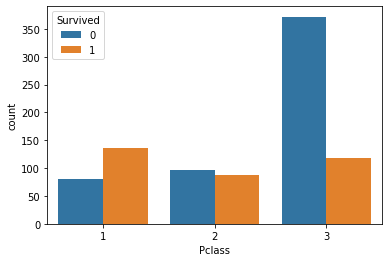

In [12]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали.**

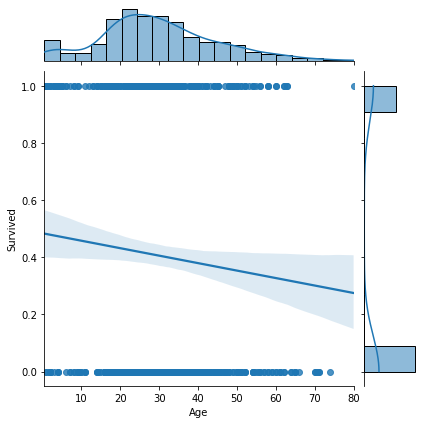

In [112]:
sns.jointplot(x='Age', y='Survived', 
              data=train_df, kind='reg')

In [108]:
sns.jointplot?


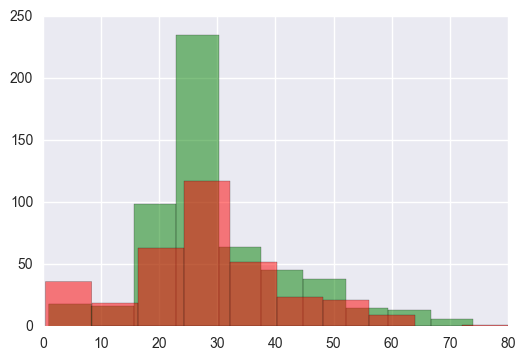

In [43]:
train_df[train_df['Survived']==False]['Age'].hist(color='green', alpha=0.5)
train_df[train_df['Survived']==True]['Age'].hist(color='red',alpha=0.5)

**Придумайте 3 новых преобразования с признаками, не рассмотренные на лекции. Оберните их в пайплайн**

In [113]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,status,status_general
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr


In [115]:
train_df['Fam']=train_df['SibSp']+train_df['Parch']

In [117]:
train_df.status.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Mme               1
Jonkheer          1
Lady              1
Ms                1
Capt              1
Sir               1
Don               1
the Countess      1
Name: status, dtype: int64

In [34]:
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.impute import SimpleImputer 

In [80]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeaturesSum(BaseEstimator, TransformerMixin):
    
    def fit(self, X1, y=None):
        return self
        
    def transform(self, X, y=None):
        return np.sum(X, axis=1).reshape(-1, 1)

    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)

In [61]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeaturesParse(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def parse(self, x):
        stat = x[x.find(', ')+2:x.find('.')]
        if stat not in ['Mr','Miss','Mrs','Master']:
            return 'Else'
        else:
            return stat 
               
    def transform(self, X, y=None):
        return X.applymap(lambda x:parse(x))

    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)

In [22]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
[("status",make_pipeline(FeaturesParse(),OneHotEncoder()),['Name']),
("label", OneHotEncoder(), ['Sex']),
("family_sum", make_pipeline(SimpleImputer(strategy='constant',fill_value = 0),FeaturesSum()), ['SibSp','Parch'])])

In [126]:
ct.fit_transform(test_df)

array([[0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 3.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])